In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [3]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/OSPTX.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [31]:
# Calculate return and lagged return
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2006-10-16 16:00:00,11947.41,12072.26,11908.57,12061.54,196978528,1.284537,1.616849
2006-10-17 16:00:00,12075.84,12075.84,11914.77,11996.63,189579744,-0.538157,1.284537
2006-10-18 16:00:00,12044.70,12066.35,11917.97,11966.00,201327408,-0.255322,-0.538157
2006-10-19 16:00:00,11974.34,12072.91,11966.00,12060.62,222364016,0.790740,-0.255322
2006-10-20 16:00:00,12103.84,12103.84,12005.55,12035.57,178457328,-0.207701,0.790740


# Slice the data into Training and Testing data

In [32]:
# Slice train and test datasets
train = df.loc['2008':'2012']
test = df.loc['2013']

In [33]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [35]:
# Display top rows for x_train
X_train.head()

,Lagged_Return
Date,
2008-01-02 16:00:00,0.084796
2008-01-03 16:00:00,0.677363
2008-01-04 16:00:00,0.369361
2008-01-07 16:00:00,-1.428081
2008-01-08 16:00:00,-1.159118


In [36]:
# Display top rows for y_train
y_train.head()

Date
2008-01-02 16:00:00    0.677363
2008-01-03 16:00:00    0.369361
2008-01-04 16:00:00   -1.428081
2008-01-07 16:00:00   -1.159118
2008-01-08 16:00:00   -0.566273
Name: Return, dtype: float64

# Fit the model to the Training Data

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [39]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)

In [42]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

In [45]:
# Display top 2 rows
Results.head(5)

,Return,Predicted Return
Date,,
2013-01-02 16:00:00,0.862506,-0.056772
2013-01-03 16:00:00,-0.560811,-0.051072
2013-01-04 16:00:00,0.564294,0.038280
2013-01-07 16:00:00,-0.329006,-0.032351
2013-01-08 16:00:00,0.042082,0.023728


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001772D8AB340>,
      dtype=object)

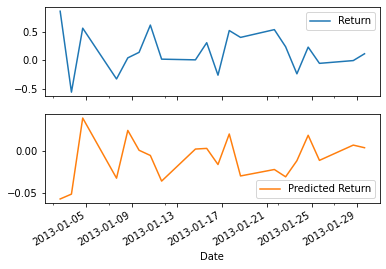

In [44]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6234031165210682


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [22]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 1.5071845476051426
